### PROBLEM STATEMENT :

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


### An Approach To Find A Solution To Problem Statement:

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset and Data Dictionary

In [2]:
data = pd.read_csv("loan.csv")

data_dir = pd.read_excel("Data_Dictionary.xlsx")

C:\Users\Sony\AppData\Local\Temp\ipykernel_6268\3767906821.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan.csv")


In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data_dir.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


### Creating a function to fetch column info

In [5]:
data_dir.set_index("LoanStatNew" , inplace = True)

In [6]:
data_dir.loc["addr_state"]["Description"]

'The state provided by the borrower in the loan application'

In [7]:
def fun_col_info(col_name):
    
    print(data_dir.loc[col_name]["Description"])   
    

In [8]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calling the function

In [9]:
fun_col_info('mort_acc')

Number of mortgage accounts.


### Checking the shape of dataset

In [10]:
print("No. of Rows = " , data.shape[0])

print("No. of Columns = " , data.shape[1])

No. of Rows =  39717
No. of Columns =  111


### Checking  the info of dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Checking the statistical info

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,10947.713196,7187.238670,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,39678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Value Treatment

In [13]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [14]:
missing_colms = data.columns[data.isnull().sum() > 39700]

In [15]:
data.shape

(39717, 111)

In [16]:
data = data.drop(missing_colms , axis = 1)

In [17]:
data.shape

(39717, 57)

### Note:

The columns having 100% missing rows are dropped

### Checking missing data interms of %

In [18]:
100 * data.isnull().sum() / len(data)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### Checking the info of columns still having missing values

In [19]:
still_missing = data.columns[100 * data.isnull().sum() / len(data) > 0]

In [20]:
still_missing

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [21]:
fun_col_info(still_missing)

emp_title                     The job title supplied by the Borrower when ap...
emp_length                    Employment length in years. Possible values ar...
desc                                  Loan description provided by the borrower
title                                   The loan title provided by the borrower
mths_since_last_delinq        The number of months since the borrower's last...
mths_since_last_record        The number of months since the last public rec...
revol_util                    Revolving line utilization rate, or the amount...
last_pymnt_d                                    Last month payment was received
next_pymnt_d                                        Next scheduled payment date
last_credit_pull_d            The most recent month LC pulled credit for thi...
collections_12_mths_ex_med    Number of collections in 12 months excluding m...
chargeoff_within_12_mths                 Number of charge-offs within 12 months
pub_rec_bankruptcies                    

### Dropping columns having more than 5% missing Data

In [22]:
data = data.drop(still_missing , axis = 1)

In [23]:
data.shape

(39717, 43)

### Performing Exploratory Data Analysis

In [24]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [25]:
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.0,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.0,117.08,1.11,119.66,1,INDIVIDUAL,0,0


In [26]:
### Dropping id and member_id column

In [27]:
data = data.drop(["id" , "member_id"] , axis = 1)

### Loan Amount

In [28]:
### Checking the distribution of Loan Amount Column

In [29]:
fun_col_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


C:\Users\Sony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


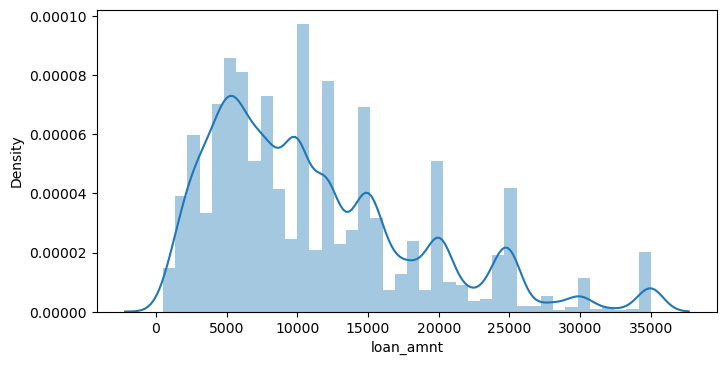

In [30]:
plt.figure(figsize = (8,4), dpi = 100)

sns.distplot(data["loan_amnt"] , kde = True, bins = 40);

### Observation:

The distribution of the loan amount column appear to be right skeweed and most of the loans those were advanced lie between 1 to 15000 dollars (assuming the currency is dollars).


### Funded Amount

In [31]:
fun_col_info('funded_amnt')

The total amount committed to that loan at that point in time.


In [32]:
data[["loan_amnt" , "funded_amnt"]].head()

,loan_amnt,funded_amnt
0,5000,5000
1,2500,2500
2,2400,2400
3,10000,10000
4,3000,3000


C:\Users\Sony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


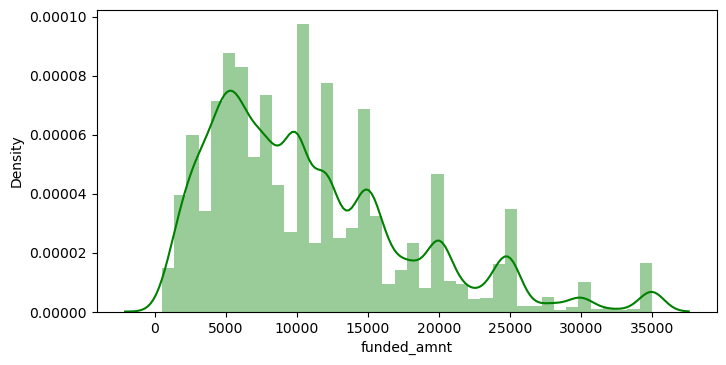

In [33]:
plt.figure(figsize = (8,4), dpi = 100)

sns.distplot(data["funded_amnt"] , kde = True, bins = 40, color = "green");

### Observation:

From the description of loan amount column and the funded amount column and comparing the values in these two columns it appears that both the column contai same information. Hence, to avoid data duplicacy and redundancy its better to drop one of these two columns. 

In [34]:
### Dropping Funded Amount Column

In [35]:
data.shape

(39717, 41)

In [36]:
data = data.drop("funded_amnt" , axis = 1)

In [37]:
data.shape

(39717, 40)

In [38]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

C:\Users\Sony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


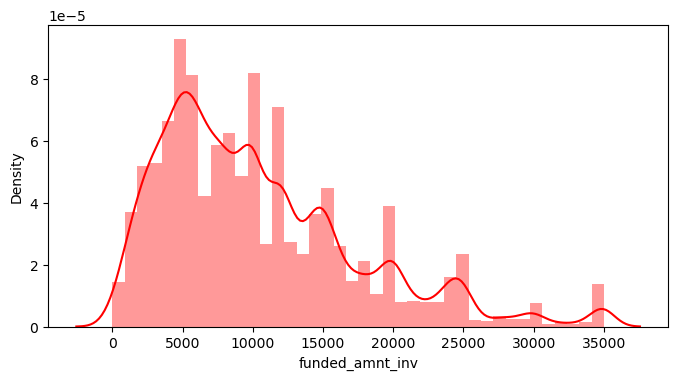

In [39]:
plt.figure(figsize = (8,4), dpi = 100)

sns.distplot(data["funded_amnt_inv"] , kde = True, bins = 40, color = "red" );

In [40]:
fun_col_info("funded_amnt_inv")

The total amount committed by investors for that loan at that point in time.


In [41]:
data[["loan_amnt" , "funded_amnt_inv"]].head()

,loan_amnt,funded_amnt_inv
0,5000,4975.0
1,2500,2500.0
2,2400,2400.0
3,10000,10000.0
4,3000,3000.0


In [42]:
len(data) - (data["loan_amnt"] == data["funded_amnt_inv"]).sum()

20189

### Observation:

Out of total of 39717 loans those were sanctioned there are 20189 borroweres who did not avail the entire amount that was sanctioned to them and instead committed to the lesser loan amount.

### Term

In [43]:
fun_col_info("term")

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [44]:
data["term"].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

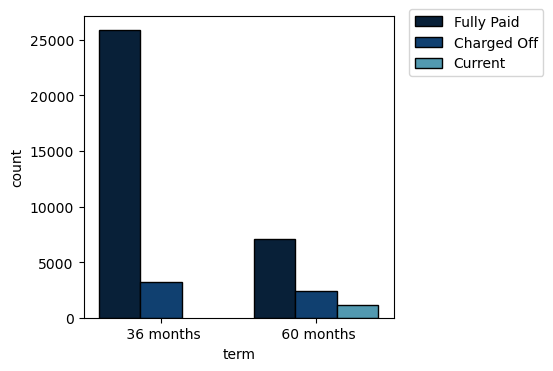

In [45]:
plt.figure(figsize = (4,4), dpi = 100)

sns.countplot(data = data , x = "term", palette = "ocean" , edgecolor = "black", hue = "loan_status")
plt.legend(loc = (1.05 , 0.8));

### Observation :

Most Loans were given for 36 Months term

In [46]:
data["term"].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [47]:
data["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [48]:
data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [49]:
data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### Checking Default Ratio wrt Term

In [50]:
term_36_df = data[data["term"] == ' 36 months']

In [51]:
term_60_df = data[data["term"] == ' 60 months']

In [52]:
term_36_default_ratio = 100 * len(term_36_df[term_36_df["loan_status"] == 'Charged Off']) / len(term_36_df)

In [53]:
term_60_default_ratio = 100 * len(term_60_df[term_60_df["loan_status"] == 'Charged Off']) / len(term_60_df)

In [54]:
print("Default ratio for 36-month term loans:", round(term_36_default_ratio , 2))
print("Default ratio for 60-month term loans:", round(term_60_default_ratio , 2))

Default ratio for 36-month term loans: 11.09
Default ratio for 60-month term loans: 22.6


C:\Users\Sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


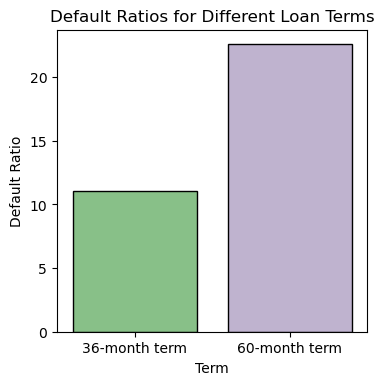

In [55]:
labels = ['36-month term', '60-month term']
default_ratios = [term_36_default_ratio, term_60_default_ratio]

plt.figure(figsize = (4,4) , dpi = 100)
sns.barplot(labels, default_ratios , palette = "Accent" , edgecolor = "black")
plt.xlabel('Term')
plt.ylabel('Default Ratio')
plt.title('Default Ratios for Different Loan Terms')
plt.show()

### Observation:

Clearly from the above plot is appears that if the term of the loan is 60 months the likelihood of default is more.

In [56]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

### Cleaning The Term Column

In [57]:
data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [58]:
def fun_clean_term(term):
    
    if term == ' 36 months':
        return "36"
    else:
        return "60"

In [59]:
data["term"] = data["term"].apply(fun_clean_term)

In [60]:
data["term"].unique()

array(['36', '60'], dtype=object)

### Converting the datatype of term column

In [61]:
data["term"] = data["term"].astype(int)

### Interest Rate

In [62]:
fun_col_info("int_rate")

Interest Rate on the loan


In [63]:
data["int_rate"].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

### Cleaning Interest Rate Column

In [64]:
data["int_rate_int"] = data["int_rate"].str[:-1]

In [65]:
data[["int_rate" , "int_rate_int"]].head()

,int_rate,int_rate_int
0,10.65%,10.65
1,15.27%,15.27
2,15.96%,15.96
3,13.49%,13.49
4,12.69%,12.69


In [66]:
data = data.drop("int_rate" , axis = 1)

### Converting datatype of int_rate column to Float

In [67]:
data["int_rate_int"] = data["int_rate_int"].astype(float)

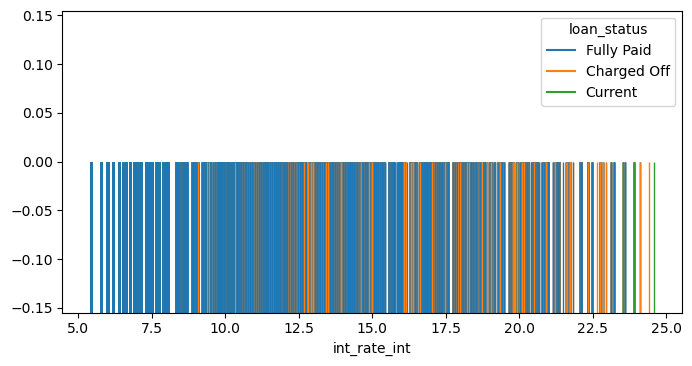

In [68]:
plt.figure(figsize = (8,4), dpi = 100)

sns.rugplot(data = data , x = "int_rate_int" , height = 0.5, hue = "loan_status");

### Observation:

Clearly form the above rugplot it appears that as the rate of interest on loan increases there is a likelihood that the person with interest rate above 12.5% might default.

### Grade and Subgrade

In [69]:
fun_col_info("grade")

LC assigned loan grade


In [70]:
fun_col_info("sub_grade")

LC assigned loan subgrade


In [71]:
data["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [72]:
data.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

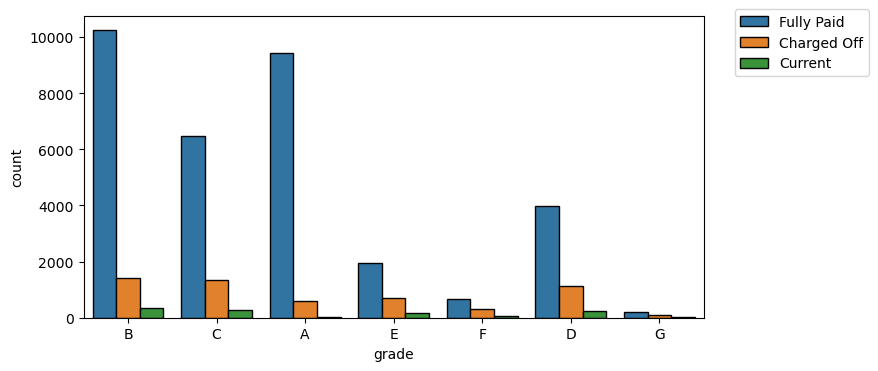

In [73]:
plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(x = "grade" , data = data , hue = "loan_status", edgecolor = "black")
plt.legend(loc = (1.05, 0.8));

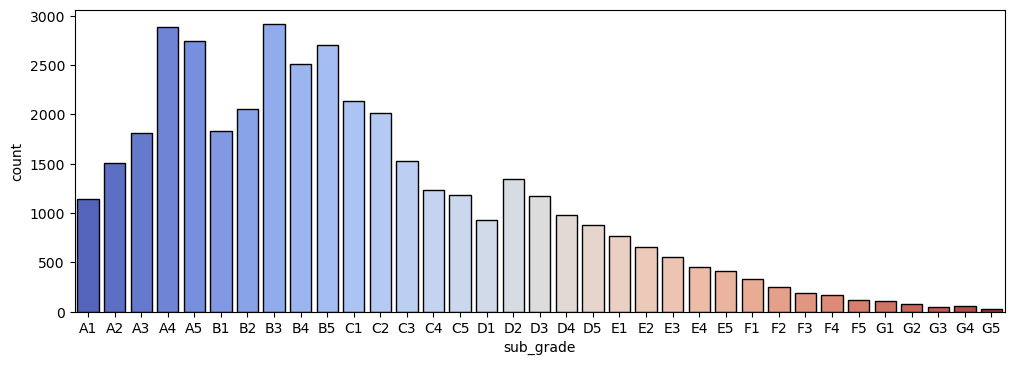

In [74]:
plt.figure(figsize = (12,4), dpi = 100)

order = sorted(data["sub_grade"].unique())

sns.countplot(x = "sub_grade" , data = data, order = order, palette="coolwarm", edgecolor = "black");

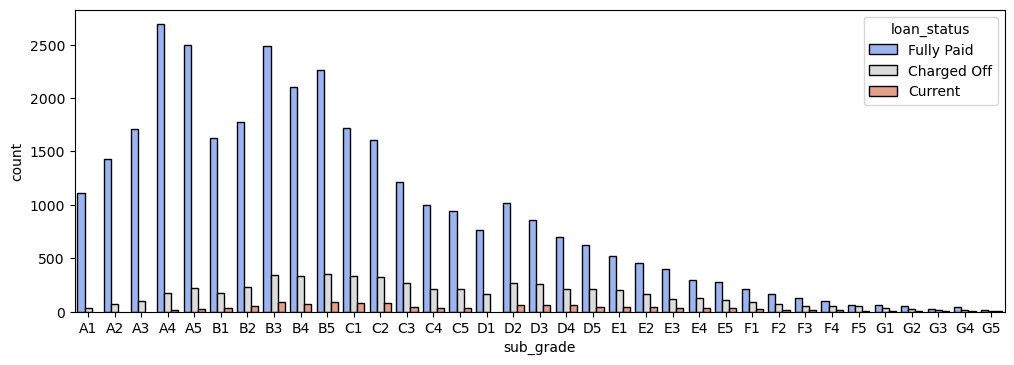

In [75]:
plt.figure(figsize = (12,4), dpi = 100)

order = sorted(data["sub_grade"].unique())

sns.countplot(x = "sub_grade" , data = data, order = order, palette="coolwarm", hue = "loan_status", edgecolor = "black");

### Observation:

We can see that the loan status for the F and G grade is almost the same. Which means there is a high chance that if the lending is done to someone with F and G grade then the person might default the loan.

### Home Ownership

In [76]:
fun_col_info("home_ownership")

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


In [77]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [78]:
order = data['home_ownership'].value_counts().index

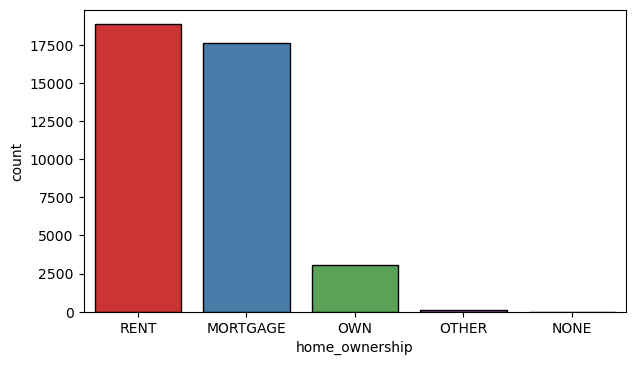

In [79]:
plt.figure(figsize = (7,4), dpi = 100)

sns.countplot(data = data, x = "home_ownership", palette = "Set1",
              edgecolor = "black", order = order);

### Observation:

It appears that in the given dataset there are a very few people who own house. Majority of the people have either rented the home or have mortgaged.

### Verification Status

In [80]:
fun_col_info("verification_status")

Indicates if income was verified by LC, not verified, or if the income source was verified


In [81]:
o = data["verification_status"].value_counts().index

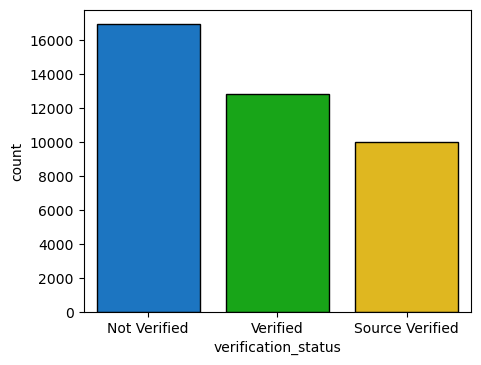

In [82]:
plt.figure(figsize = (5,4), dpi = 100)

sns.countplot(data = data, x = 'verification_status', palette = "nipy_spectral",
              edgecolor = "black", order = o);

In [83]:
data["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [84]:
verified_df = data[data["verification_status"] == "Verified"]

In [85]:
sourced_verified_df = data[data["verification_status"] == 'Source Verified']

In [86]:
not_verified_df = data[data["verification_status"] == 'Not Verified']

In [87]:
data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [88]:
default_ratio_verified = 100 * len(verified_df[verified_df["loan_status"] == 'Charged Off']) / len(verified_df)

In [89]:
default_ratio_source_verified = 100 * len(sourced_verified_df[sourced_verified_df["loan_status"] == 'Charged Off']) / len(sourced_verified_df)

In [90]:
default_ratio_source_not_verified = 100 * len(not_verified_df[not_verified_df["loan_status"] == 'Charged Off']) / len(not_verified_df)

C:\Users\Sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


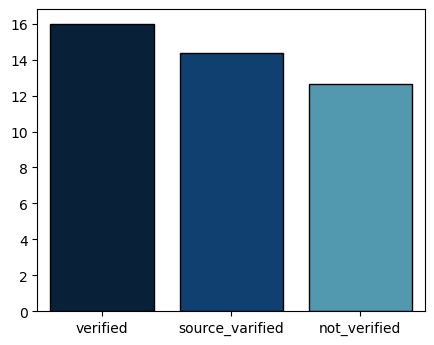

In [91]:
labels = ["verified" , "source_varified" , "not_verified"]
default_ratios = [default_ratio_verified , default_ratio_source_verified, default_ratio_source_not_verified ]

plt.figure(figsize = (5,4), dpi = 100)
sns.barplot(labels, default_ratios, palette = "ocean", edgecolor = "black");

### Observation:

It is strange that the people whose income was verified by either Lending Club staff or Source Vrified seems to have high default ratio than those whose income was not verified.

### Payment Plan

In [92]:
fun_col_info("pymnt_plan")

Indicates if a payment plan has been put in place for the loan


In [93]:
data["pymnt_plan"].unique()

array(['n'], dtype=object)

### Observation:

it appears that there is no playment plan put in place for any of the loans. Hence this column is of no use to us.

### Dropping Payment_plan Column

In [94]:
data.shape

(39717, 40)

In [95]:
data = data.drop("pymnt_plan" , axis = 1)

In [96]:
data.shape

(39717, 39)

### Dropping URL

In [97]:
data = data.drop("url" , axis = 1)

### Purpose

In [98]:
fun_col_info("purpose")

A category provided by the borrower for the loan request. 


In [99]:
data["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [100]:
oredr = data["purpose"].value_counts().index

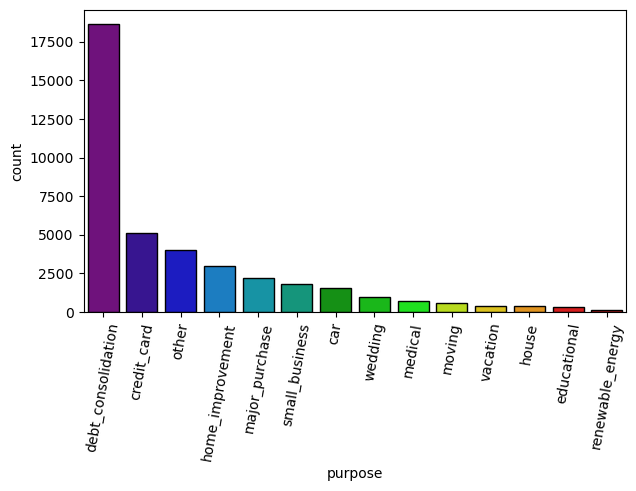

In [101]:
plt.figure(figsize = (7,4), dpi = 100)

sns.countplot(data = data, x = 'purpose', palette = "nipy_spectral",
              edgecolor = "black", order = oredr)
plt.xticks(rotation = 80);

### Observation:

There are 14 categories under purpose of loan. But if we study each category we understand that there is no need to have these many categories because purposes like wedding, moving, medical, vacation etc can be clubbed under Personal Loan category. So keeping only 5 main categories as purpose as below.

In [102]:
new_purpose = {'credit_card' : 'Credit Card',
               'car' : 'Car',
               'small_business' : 'Personal Loan',
               'other' : 'Personal Loan',
               'wedding' : 'Personal Loan',
               'debt_consolidation' : 'Personal Loan',
               'home_improvement' : 'Home Loan',
               'major_purchase' : 'Personal Loan',
               'medical' : 'Personal Loan',
               'moving' : 'Personal Loan',
               'vacation' : 'Personal Loan',
               'house' : 'Home Loan',
               'renewable_energy' : 'Personal Loan',
               'educational' : 'educational'         
               }

In [103]:
data["purpose_of_loan"] = data["purpose"].map(new_purpose)

In [104]:
data = data.drop("purpose" , axis = 1)

In [105]:
order = data["purpose_of_loan"].value_counts().index

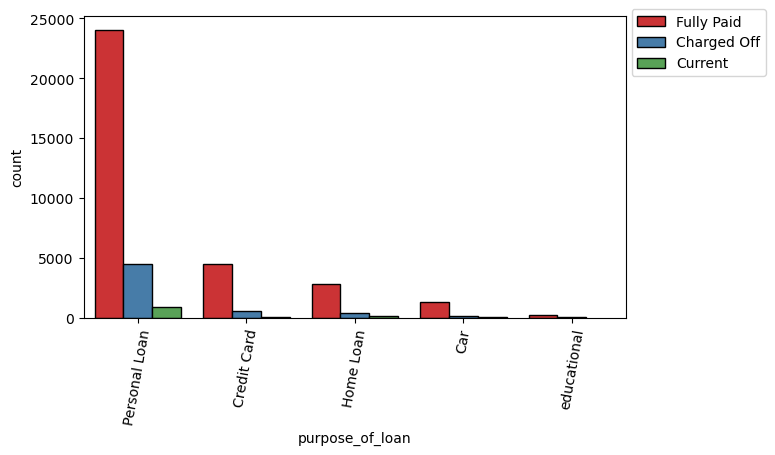

In [106]:
plt.figure(figsize = (7,4), dpi = 100)

sns.countplot(data = data, x = 'purpose_of_loan', palette = "Set1",
              edgecolor = "black", order = order, hue = "loan_status")
plt.xticks(rotation = 80)
plt.legend(loc = (1.01, 0.8));

### Observation:

The Lending Club appear to advance more advance more personal loans especially for Debt consolidation. Debt consolidation is a liability created to clear other liabilities. If the person is creating liabilities to clear of other previous liabilities then it can be inferred that the person is spending way more than his income. And hence at some point of time the persons' Tangible Net Worth to Outside Liability ratio might increase and this may lead to person committing default. And this clearly appears from the above plot. Hence, Lending Club should focus on advancing more secured loans like housing loans where the house is mortaged or the vehicle loan where vehicle/car is hypothecated.

###  Debt To Income Ratio (dti)

In [107]:
fun_col_info("dti")

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [108]:
data["dti"].max()

29.99

In [109]:
dti_ranges = [0, 10, 20, 30]

# Creating a new column with DTI ranges
data['dti_range'] = pd.cut(data['dti'], dti_ranges)


In [110]:
loan_status_by_dti = data.groupby('dti_range')['loan_status'].value_counts(normalize=True).unstack()

<Figure size 700x400 with 0 Axes>

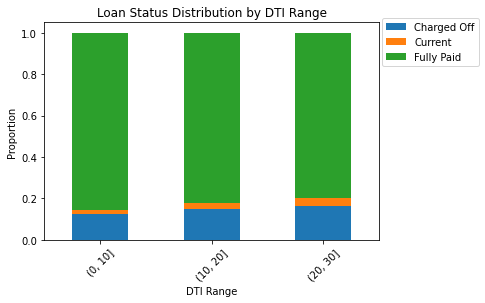

In [111]:
# Plotting the loan status distribution by DTI range
plt.figure(figsize = (7,4) , dpi = 100)
loan_status_by_dti.plot(kind='bar', stacked=True)
plt.xlabel('DTI Range')
plt.ylabel('Proportion')
plt.title('Loan Status Distribution by DTI Range')
plt.legend(loc=(1.01,0.8))
plt.xticks(rotation=45);

### Observation:

It is clearly evident from the abobe plot that as the debt to income ratio increases the rate of loan default increases. We can corelate this with people borrowing the loan for debt consolidation as commented above.

### Account Now Delinquent

In [112]:
fun_col_info('acc_now_delinq')

The number of accounts on which the borrower is now delinquent.


In [113]:
data["acc_now_delinq"].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

### Observation:

The acc_now_delinq column doesn't help much in analysis hence dropping the column.

In [114]:
data.shape

(39717, 39)

In [115]:
data = data.drop("acc_now_delinq" , axis = 1)

In [116]:
data = data.drop(['zip_code', 'addr_state'] , axis = 1)

In [117]:
data.shape

(39717, 36)

### Application Type

In [118]:
fun_col_info("application_type")

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [119]:
data["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

### Observation:
The application type column doesn't help much in analysis hence dropping the column.

In [120]:
data = data.drop("application_type" , axis = 1)

In [121]:
fun_col_info("policy_code")

publicly available policy_code=1
new products not publicly available policy_code=2


In [122]:
data["policy_code"].unique()

array([1], dtype=int64)

### Observation:

The application type column doesn't help much in analysis hence dropping the column.

In [123]:
data = data.drop("policy_code" , axis = 1)

### Last Payment Amount

In [124]:
fun_col_info("last_pymnt_amnt")

Last total payment amount received


In [125]:
data["last_pymnt_amnt"].max()

36115.2

In [126]:
last_payment_range = [0 , 10000, 20000, 30000, 40000]

In [127]:
data["last_pymnt_range"] = pd.cut(data["last_pymnt_amnt"] , last_payment_range)

In [128]:
loan_status_by_last_pymnt_range = data.groupby('last_pymnt_range')['loan_status'].value_counts(normalize=True).unstack()

<Figure size 800x400 with 0 Axes>

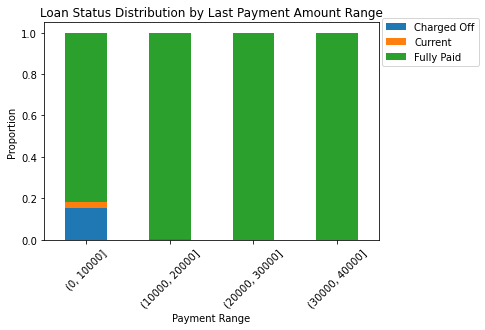

In [129]:
plt.figure(figsize = (8,4) , dpi = 100)

loan_status_by_last_pymnt_range.plot(kind='bar', stacked=True)

plt.xlabel('Payment Range')
plt.ylabel('Proportion')
plt.title('Loan Status Distribution by Last Payment Amount Range')
plt.legend(loc= (1.01 , 0.8))
plt.xticks(rotation=45);

### Observation:

Clearly from the above figure it is evident that if the last payment made by the borrower is more than 10,000 dollars then likelyhood of default is negligible.

### Delinquent Amount

In [130]:
fun_col_info("delinq_amnt")

The past-due amount owed for the accounts on which the borrower is now delinquent.


In [131]:
data["delinq_amnt"].unique()

array([0], dtype=int64)

### Observation:

The delinq_amnt column doesn't help much in analysis hence dropping the column.

In [132]:
data = data.drop("delinq_amnt" , axis =1 )

### Revolving Balance

In [133]:
fun_col_info("revol_bal")

Total credit revolving balance


In [134]:
data["revol_bal"].max()

149588

In [135]:
revol_bal_range = [0 , 100000, 110000, 120000, 130000, 140000, 150000]

In [136]:
data["revol_bal_range"] = pd.cut(data["revol_bal"] , revol_bal_range)

In [137]:
loan_status_by_revol_bal_range = data.groupby('revol_bal_range')['loan_status'].value_counts(normalize=True).unstack()

<Figure size 800x400 with 0 Axes>

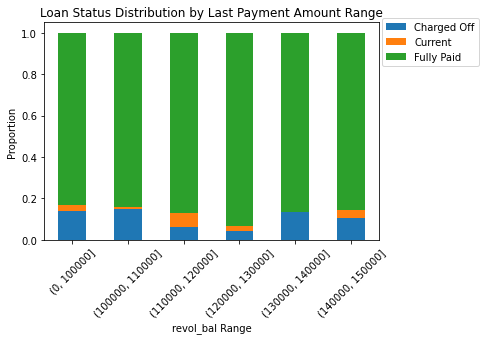

In [138]:
plt.figure(figsize = (8,4) , dpi = 100)

loan_status_by_revol_bal_range.plot(kind='bar', stacked=True)

plt.xlabel('revol_bal Range')
plt.ylabel('Proportion')
plt.title('Loan Status Distribution by Last Payment Amount Range')
plt.legend(loc= (1.01 , 0.8))
plt.xticks(rotation=45);

### Observation:

If the revolving balance is in the range of 110000 to 130000 dollars then the likelyhood of default is less.

### Bivariate Analysis

### Loan Amount vs Installment

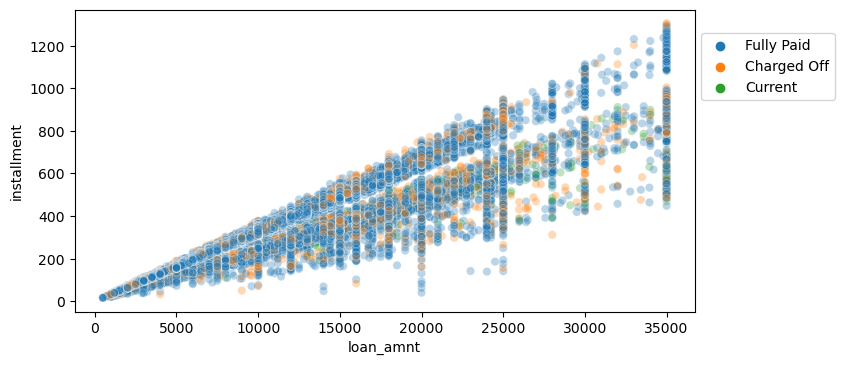

In [139]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.scatterplot(data = data, x = "loan_amnt" , y = "installment", color = "teal",
               alpha = 0.3, hue = "loan_status")
plt.legend(loc=(1.01,0.7));

### Observation:

The loan installment is proportional to loan amount. Further, the likelihood of default seem to increase when the loan amount tis greater then 15000 dollars.

### Loan Status vs Loan Amount

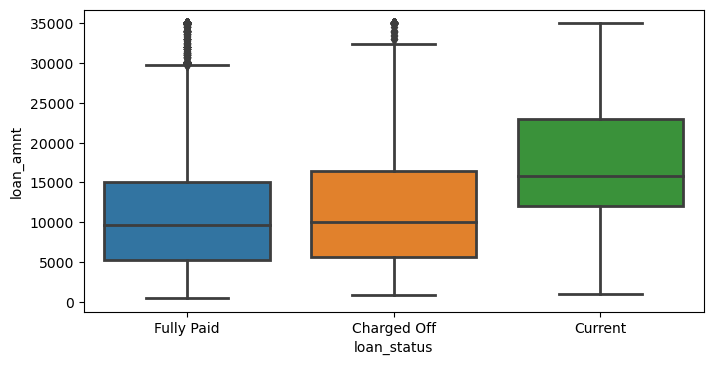

In [140]:
plt.figure(figsize = (8,4) , dpi = 100)
sns.boxplot(x = "loan_status" , y = "loan_amnt", data = data, linewidth = 2);

In [141]:
data.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Current,1140.0,17053.991228,8651.052316,1000.0,12000.0,15825.0,23000.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


### Observation:

It can be inferred from the boxplot that mean of loan amount of the people who didnt repay the loan is higher.

### Grades vs Loan Interest

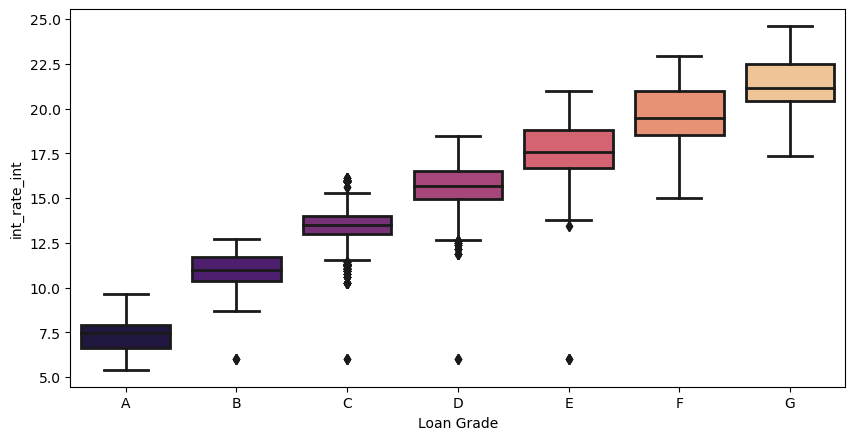

In [142]:
plt.figure(figsize=(10, 5), dpi = 100)

sns.boxplot(data=data, x='grade', y='int_rate_int', order=sorted(data['grade'].unique()) , 
            palette = "magma", linewidth = 2)
plt.xlabel('Loan Grade');

### Observation:

Clearly, as the grades start to worsen the interest rate goes up. It is a good technique to manage the credit risk. 

### Term vs Interest Rate

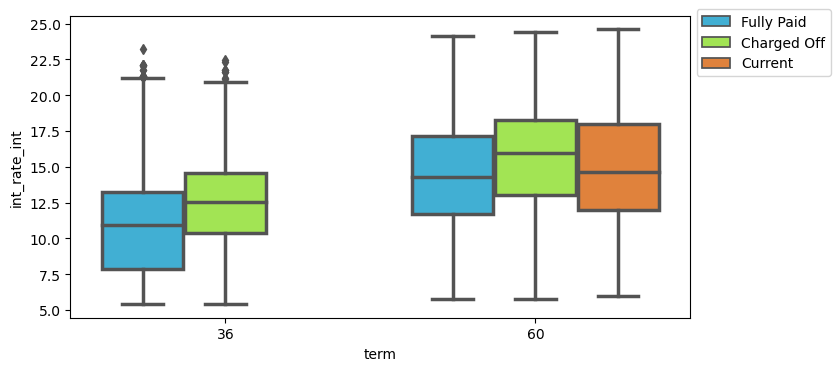

In [143]:
plt.figure(figsize=(8, 4), dpi = 100)

sns.boxplot(data=data, x='term', y='int_rate_int', 
            hue = "loan_status", palette = "turbo", linewidth=2.5)

plt.legend(loc = (1.01 , 0.8));

### Observation:

The loans with 60 Months seem to have higher interest values and within that those loans which were charged off seem to have higher mean interest values.

### Correlation of between variables 

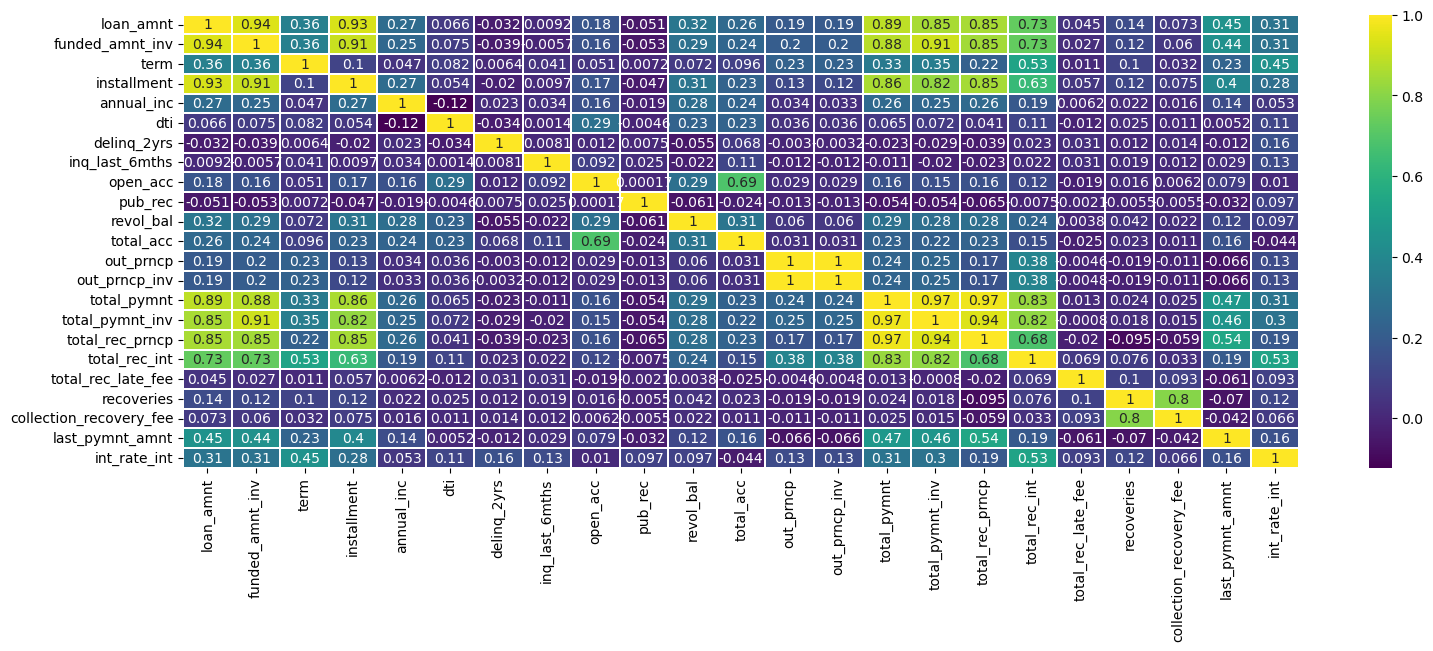

In [144]:
plt.figure(figsize = (18,6), dpi = 100)

sns.heatmap(data.corr(), annot= True, cmap = "viridis", linewidths= 0.2);

### Observations from heatmap:

1) There is almost perfect relationship between loan amount, funded amount, installment and total payment.

2) Total payment has almost perfect relationship between total recovered principle.

3) There is perfect relationship between outstanding principle and remaining outstanding principal for portion of total amount funded by investors.

#### All the above mentioned columns may cause multicollinearity issue while training the machine learning model.